In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob
from scipy.io import savemat

<Figure size 640x480 with 0 Axes>

In [2]:
ml_data_dir = "/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data/"
dateID = '250107'

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set01 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 12:43:32 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set02 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 12:52:18 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set03 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:00:39 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set04 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:09:16 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set05 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:26:43 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set06 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:36:55 2025 


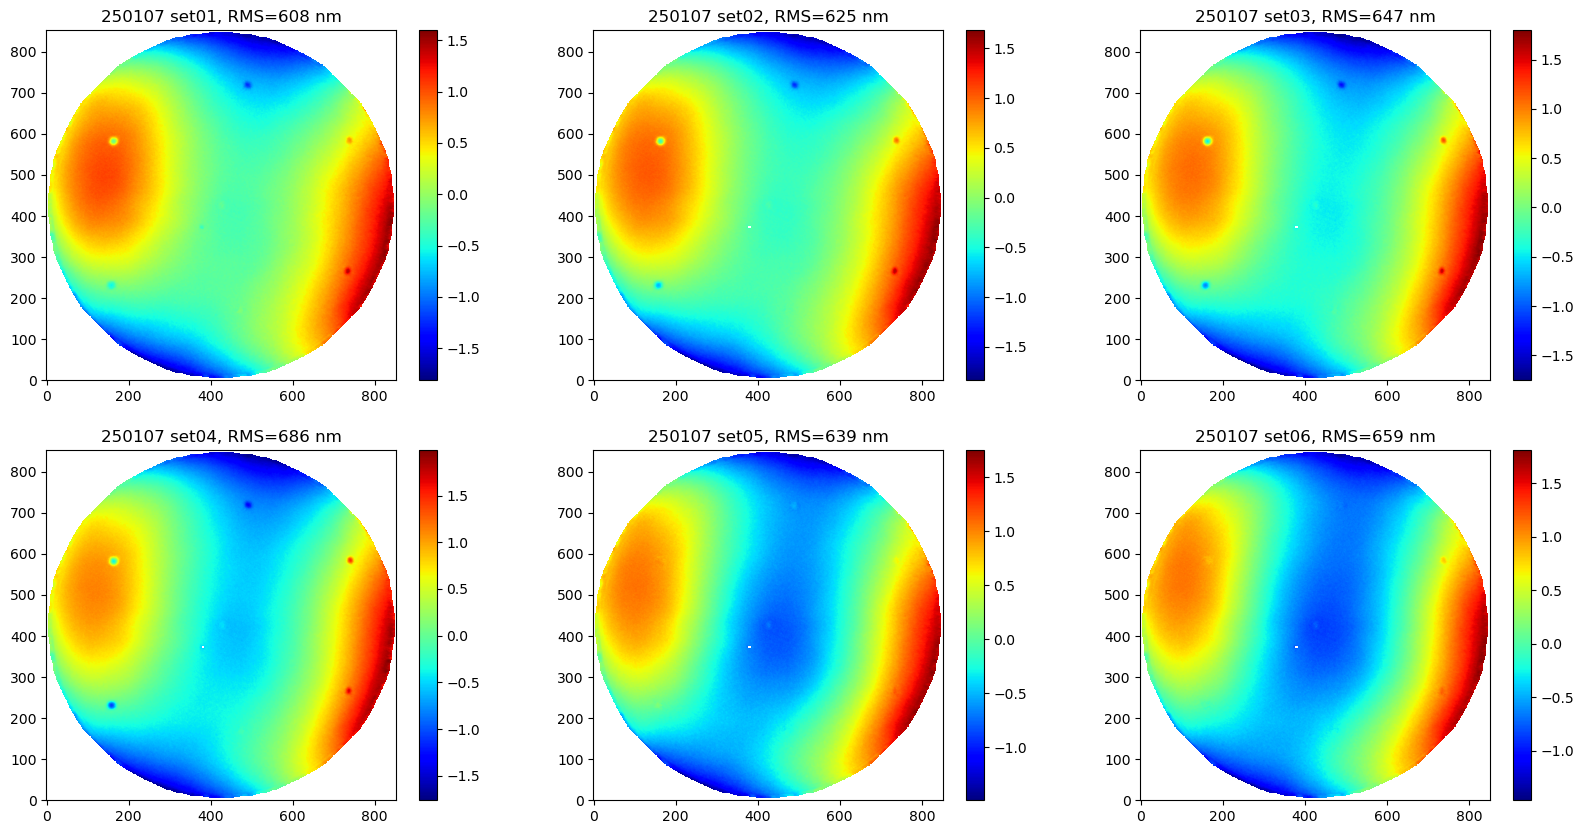

In [14]:
# without T comp
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*sub.h5'%(ml_data_dir,dateID, dateID, i+1)))
    if len(fileset)>0:
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms))

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set01 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 12:43:32 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set02 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 12:52:18 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set03 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:00:39 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set04 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:09:16 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set05 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:26:43 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set06 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:36:55 2025

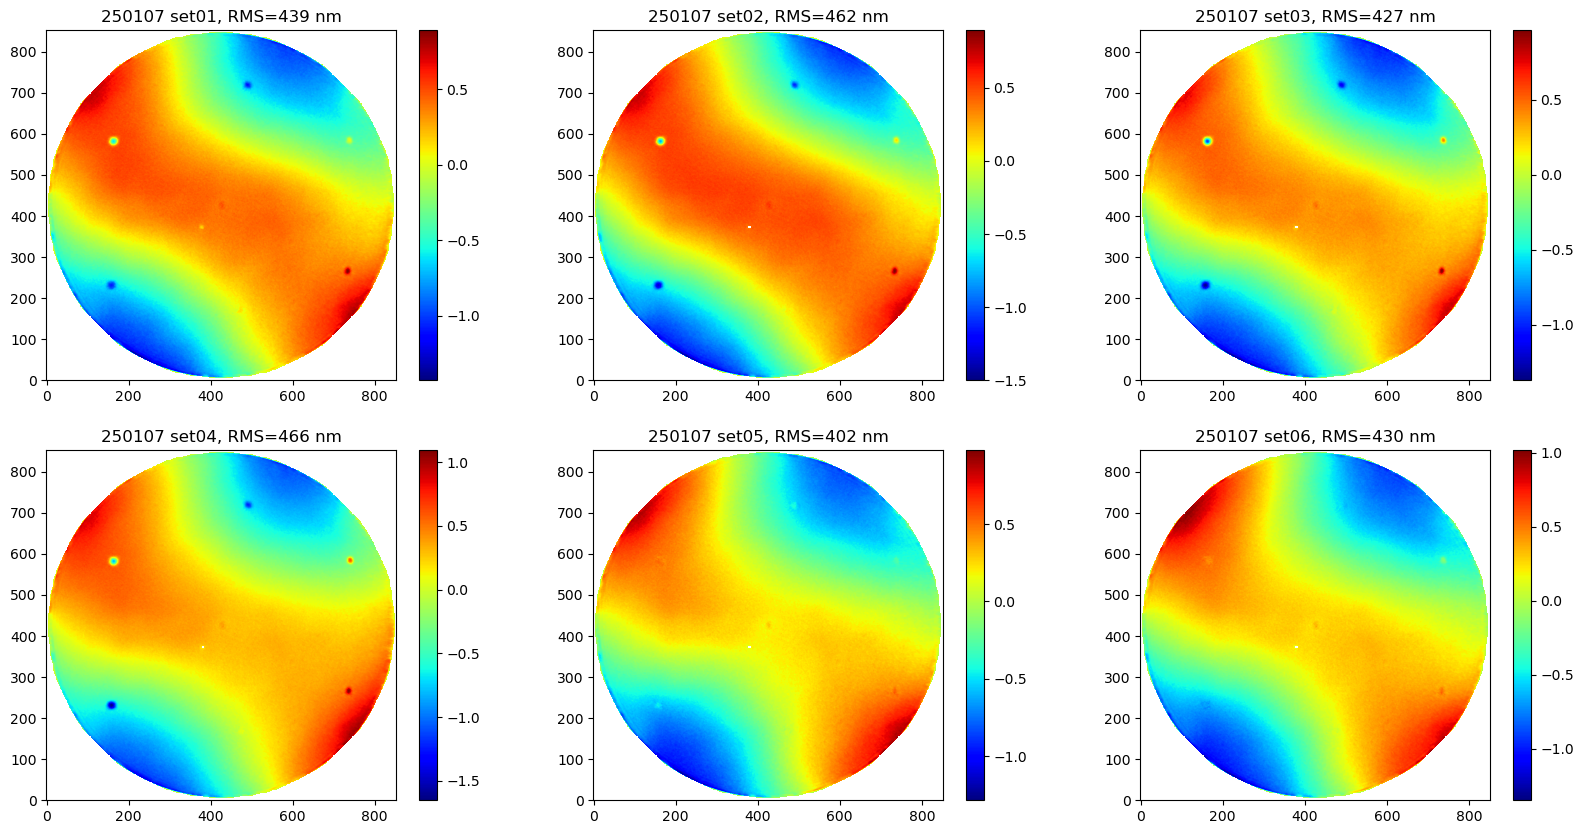

In [23]:
# with T comp
m1sAve = np.zeros((Sxn, Syn))
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*comp.h5'%(ml_data_dir,dateID, dateID, i+1)))
    if len(fileset)>0:
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)
        m1sAve += m1s
        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms))
m1sAve /= 6

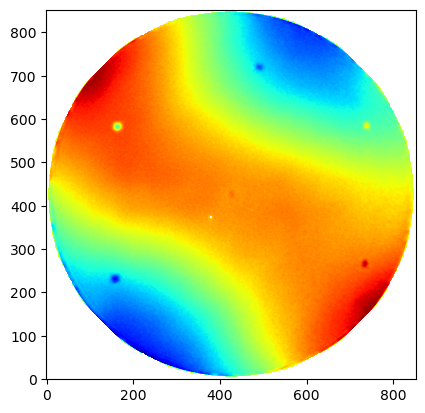

In [25]:
plt.imshow(m1sAve, origin='lower')

In [27]:
savemat('sec5m1sAve.mat',{'m1s':m1sAve})